<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://raw.githubusercontent.com/Unidata/MetPy/master/src/metpy/plots/_static/unidata_150x150.png" alt="Unidata Logo" style="height: 98px;">
</div>

<h1>Data Access with MetPy</h1>
    <h3>AMS 2022 Short Course: MetPy for Quantitative Analysis of Meteorological Data</h3>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

### Tasks
1. <a href="#tdscatalog">Working with the TDS Catalog</a>
1. <a href="#datastruct">xarray Data Structures</a>
1. <a href="# "> </a>

<a name="background"></a>
## Background
Atmospheric data are collected by numerous institutions in a variety of data formats and stored in disparate places. Accessing and distributing these datasets are complicated activities, but are made simpler with the use of the THREDDS Data Server (TDS). In this lesson, you will learn more about data access with the TDS and how to use data in Python.

### THREDDS Data Server (TDS)
THREDDS is middleware to bridge the gap between data providers and data users. Data on the TDS are organized into catalogs that data users can browse and use to request data. While anyone can host their own TDS, Unidata hosts a publicly accessible TDS at [thredds.ucar.edu](https://thredds.ucar.edu/).

### Siphon
A web browser is one way to interact with a TDS, but we can also pull data from a TDS into Python projects using the Siphon Python package. Siphon doesn't require downloading data locally, saving time and storage space. Once pulled into Python, we can use packages like MetPy and Cartopy to visualize and analyze the data.

<center><img src="https://elearning.unidata.ucar.edu/metpy/AMS2022/TDSecosystem.png" width="300"/><br>
<i>The TDS - Siphon - Python ecosystem</i></center>
<br><br>
Siphon accomplishes this through a <b>TDS catalog</b> object created from an xml catalog document served by the TDS. This is a virtual catalog of items that are available on the TDS that we can then access remotely (or download locally if needed).

`cat = TDSCatalog('https://thredds.ucar.edu/.../catalog.xml') `

<a name="tdscatalog"></a>
## Working with the TDS Catalog

We can view a THREDDS Data Server (TDS) Catalog in a browser as well as in Python. For this activity, we'll start by examining Unidata's TDS catalog in our browser. <a href="https://thredds.ucar.edu" target="blank">https://thredds.ucar.edu</a>

<div class="alert alert-success">
    <b>EXERCISE</b>: TDS in the browser
    

Open this TDS link in a new tab in your browser: <a href="https://thredds.ucar.edu" target="blank">https://thredds.ucar.edu</a>
    
Locate the following catalog:
    
 <ul>
     <li>Source: High Resolution Rapid Refresh (HRRR), Analysis</li> 
     <li>Resolution: 2.5 km </li>
     <li>Collection: latest</li>
</ul>
    
Then create a variable called <code>url</code> with a value set to the URL to the dataset as a string.
</div>

In [1]:
# YOUR CODE HERE

<div class="alert alert-info">
    <b>SOLUTION</b>
</div>

In [2]:
# Solution
url = 'https://thredds.ucar.edu/thredds/catalog/grib/NCEP/HRRR/CONUS_2p5km_ANA/latest.html'

The TDSCatalog object requires an xml document as input, so we now change the extension from html to xml.

In [3]:
# Change the URL above to be an xml document using Python's built-in replace module
xmlurl = url.replace(".html", ".xml")
print(xmlurl)

https://thredds.ucar.edu/thredds/catalog/grib/NCEP/HRRR/CONUS_2p5km_ANA/latest.xml


Now that we have the catalog located, it's time to create and examine the TDSCatalog object. First we import the object from Siphon, then we input the url to the catalog of data we need.

In [4]:
# import the TDSCatalog class from Siphon for obtaining our data 
from siphon.catalog import TDSCatalog

# Create the TDS Catalog object, satcat
cat = TDSCatalog(xmlurl)

This gives us a catalog of the grib2 files we found in the browser. The names of each file are stored in the `datasets` property.

In [5]:
# Print all filenames associated with the catalog
print(cat.datasets)

# Total number of files
print('Total files: ' + str(len(cat.datasets)))

['HRRR_CONUS_2p5km_ana_20220319_0000.grib2']
Total files: 1


In this example there is only one file associated with the catalog. Next, we need to pull the data from this file into memory for visualization and/or analysis. For this, we need to use the `remote_access()` method from Siphon. 

In [6]:
# Grab the first (and only) file
hrrrdata = cat.datasets[0].remote_access(use_xarray=True)

type(hrrrdata)

xarray.core.dataset.Dataset

<a name="datastruct"></a>
## xarray Data Structures

Now we have an xarray **Dataset** that we can work with. This is a framework used for organizing multidimensional datasets, such as NetCDF and GRIB. 

To do any further work in MetPy, we'll need to parse the data and metadata. This allows MetPy functions to use the correct projection and units for calculations and visualizations using CF conventions. 

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">More Info</p>
    You may see the CF (Climate and Forecasting) metadata conventions in many popular atmospheric datasets. These conventions provide standardized variable names and units and recommendations on metadata such as projection information and coordinate information. You can read more about CF conventions here: <a href="cfconventions.org" target="blank">https://cfconventions.org/</a>
</div>

In [7]:
import metpy
hrrrdata = hrrrdata.metpy.parse_cf()

xarray has an HTML-formatted interactive summary tool for examing datasets. Simply execute the variable name to create the summary. This is a tool we will use often to examine our data throughout this course.  

In [8]:
# Preview xarray DataSet in an HTML-formatted preview
hrrrdata

<xarray.Dataset>
Dimensions:                                                                   (height_above_ground_layer: 2, : 2, pressure_difference_layer: 1, height_above_ground_layer1: 2, pressure_difference_layer1: 1, pressure_difference_layer2: 2, height_above_ground_layer2: 1, isobaric_layer: 1, x: 2145, y: 1377, time: 1, isobaric: 5, height_above_ground1: 1, isobaric1: 4, height_above_ground: 1, height_above_ground2: 2)
Coordinates: (12/17)
    reftime                                                                   datetime64[ns] ...
  * height_above_ground_layer                                                 (height_above_ground_layer) float32 ...
  * pressure_difference_layer                                                 (pressure_difference_layer) float32 ...
  * height_above_ground_layer1                                                (height_above_ground_layer1) float32 ...
  * pressure_difference_layer1                                                (pressure_difference_layer1) float32 ...
  * pressure_difference_layer2                                                (pressure_difference_layer2) float32 ...
    ...                                                                        ...
    metpy_crs                                                                 object ...
  * isobaric                                                                  (isobaric) float32 ...
  * height_above_ground1                                                      (height_above_ground1) float32 ...
  * isobaric1                                                                 (isobaric1) float32 ...
  * height_above_ground                                                       (height_above_ground) float32 ...
  * height_above_ground2                                                      (height_above_ground2) float32 ...
Dimensions without coordinates: 
Data variables: (12/54)
    LambertConformal_Projection                                               int32 ...
    height_above_ground_layer_bounds                                          (height_above_ground_layer, ) float32 ...
    pressure_difference_layer_bounds                                          (pressure_difference_layer, ) float32 ...
    height_above_ground_layer1_bounds                                         (height_above_ground_layer1, ) float32 ...
    pressure_difference_layer1_bounds                                         (pressure_difference_layer1, ) float32 ...
    pressure_difference_layer2_bounds                                         (pressure_difference_layer2, ) float32 ...
    ...                                                                        ...
    u-component_of_wind_isobaric                                              (time, isobaric, y, x) float32 ...
    u-component_of_wind_height_above_ground                                   (time, height_above_ground2, y, x) float32 ...
    u-component_storm_motion_height_above_ground_layer                        (time, height_above_ground_layer2, y, x) float32 ...
    v-component_of_wind_isobaric                                              (time, isobaric, y, x) float32 ...
    v-component_of_wind_height_above_ground                                   (time, height_above_ground2, y, x) float32 ...
    v-component_storm_motion_height_above_ground_layer                        (time, height_above_ground_layer2, y, x) float32 ...
Attributes:
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    file_format:                                                             ...
    Conventions:                                                             

In the preview, we see an interactive summary of the dimensions, coordinates, variables, attributes for the DataSet. Each variable is stored as an xarray [DataArray](https://docs.xarray.dev/en/stable/user-guide/data-structures.html#dataarray). DataArrays carry metadata such as units and projection as well as a numpy-like array of values that MetPy can leverage for calculations and plotting. 

In [9]:
temp = hrrrdata.Temperature_isobaric
temp

<xarray.DataArray 'Temperature_isobaric' (time: 1, isobaric: 5, y: 1377, x: 2145)>
[14768325 values with dtype=float32]
Coordinates:
    reftime    datetime64[ns] 2022-03-19
  * x          (x) float32 -2.763e+06 -2.761e+06 ... 2.679e+06 2.682e+06
  * y          (y) float32 -2.638e+05 -2.613e+05 ... 3.228e+06 3.231e+06
  * time       (time) datetime64[ns] 2022-03-19
    metpy_crs  object Projection: lambert_conformal_conic
  * isobaric   (isobaric) float32 5e+04 7e+04 8.5e+04 9.25e+04 1e+05
Attributes:
    long_name:                      Temperature @ Isobaric surface
    units:                          K
    abbreviation:                   TMP
    grid_mapping:                   LambertConformal_Projection
    Grib_Variable_Id:               VAR_0-0-0_L100
    Grib2_Parameter:                [0 0 0]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Temperature
    Grib2_Parameter_Name:           Temperature
    Grib2_Level_Type:               100
    Grib2_Level_Desc:               Isobaric surface
    Grib2_Generating_Process_Type:  Forecast

The variable `temp` is now an xarray DataArray that we can interact with. Notice how there are 4 dimensions in this DataArray:
- time (length 1)
- isobaric (length 5)
- y (length 1377)
- x (length 2145)

However, for plotting (and many analyses), we need a 2D array. 

First, we can remove the time dimension using the `squeeze()` method to eliminate any dimensions of length 1.

In [10]:
temp = temp.squeeze()
temp

<xarray.DataArray 'Temperature_isobaric' (isobaric: 5, y: 1377, x: 2145)>
[14768325 values with dtype=float32]
Coordinates:
    reftime    datetime64[ns] 2022-03-19
  * x          (x) float32 -2.763e+06 -2.761e+06 ... 2.679e+06 2.682e+06
  * y          (y) float32 -2.638e+05 -2.613e+05 ... 3.228e+06 3.231e+06
    time       datetime64[ns] 2022-03-19
    metpy_crs  object Projection: lambert_conformal_conic
  * isobaric   (isobaric) float32 5e+04 7e+04 8.5e+04 9.25e+04 1e+05
Attributes:
    long_name:                      Temperature @ Isobaric surface
    units:                          K
    abbreviation:                   TMP
    grid_mapping:                   LambertConformal_Projection
    Grib_Variable_Id:               VAR_0-0-0_L100
    Grib2_Parameter:                [0 0 0]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Temperature
    Grib2_Parameter_Name:           Temperature
    Grib2_Level_Type:               100
    Grib2_Level_Desc:               Isobaric surface
    Grib2_Generating_Process_Type:  Forecast

Then we can use one of the many <a href="https://xarray.pydata.org/en/stable/user-guide/indexing.html" target="blank">xarray indexing methods</a> in conjunction with MetPy to select a single pressure level, for example, 925 hPa.

`.sel()` in xarray allows us to select data that satisfy an expression. For example, a vertical index equal to a certain value. 

In [11]:
# import units for selection
from metpy.units import units 

# select vertical level equal to 925 hPa
temp925 = temp.metpy.sel(vertical = 925 * units.hPa)

# check the shape of the data to ensure DataArray is 2D
import numpy as np
np.shape(temp925)

(1377, 2145)

Now we can plot our data on geographic axes to visualize the output. 

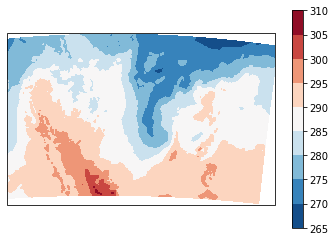

In [12]:
# Plot temperature on geographic axes

# import
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Set the projection of the data
proj = ccrs.LambertConformal()

# Plot the data
fig = plt.figure()
ax = fig.add_subplot(projection=proj)
cntr = ax.contourf(temp925, transform=proj, cmap='RdBu_r')
plt.colorbar(cntr)

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot 1000 hPa geopotential height
<br><br>    
Create a 2D array of geopotential height at the 1000 hPa (10000 Pa) level.
    
<ol>
     <li>From the <code>hrrrdata</code> DataSet, pull the <code>Geopotential_height_isobaric</code> variable</li> 
     <li><code>squeeze()</code> out any dimensions of length 1</li>
     <li><code>.sel()</code> the 1000 hPa vertical level</li>
     <li>Write the DataArray to a variable named <code>hgt1000</code>
     <li>Plot your result with the provided sample</li>
</ol>

</div>

In [13]:
# YOUR CODE HERE

In [ ]:
# PLOT YOUR DATAARRAY HERE
# Set the projection of the data
proj = ccrs.LambertConformal()

# Plot the data
fig = plt.figure()
ax = fig.add_subplot(projection=proj)
cntr = ax.contourf(hgt1000, transform=proj, cmap='RdBu_r')
plt.colorbar(cntr)

<div class="alert alert-info">
    <b>SOLUTION</b>
</div>

In [15]:
hgt = hrrrdata.Geopotential_height_isobaric.squeeze()
hgt1000 = hgt.metpy.sel(vertical = 1000 * units.hPa)

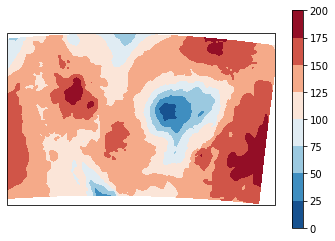

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection=proj)
cntr = ax.contourf(hgt1000, transform=proj, cmap='RdBu_r')
plt.colorbar(cntr)

<div class="alert alert-success">
    <b>EXERCISE</b>: Access RTMA output
    
Using the same method as previous, plot temperature 2 meters above ground level as output from the latest RTMA run. 

Use this url: https://thredds.ucar.edu/thredds/catalog/grib/NCEP/RTMA/CONUS_2p5km/latest.html
    
 <ol>
     <li>Create a TDSCatalog for the above data</li> 
     <li>Pull the first file in the catalog into an xarray DataSet</li>
     <li>Parse the DataSet for CF conventions</li>
     <li>Pull temperature 2 m above ground into a 2D data array</li>
     <li>Optional: plot the DataArray</li>
</ol>

</div>

In [ ]:
# YOUR CODE HERE


<div class="alert alert-info">
    <b>SOLUTION</b>
</div>

In [17]:
# Solution
url = 'https://thredds.ucar.edu/thredds/catalog/grib/NCEP/RTMA/CONUS_2p5km/latest.html'
xmlurl = url.replace(".html", ".xml")
cat = TDSCatalog(xmlurl)
rtmadata = cat.datasets[0].remote_access(use_xarray=True)
rtmadata.metpy.parse_cf()
rtmatemp = rtmadata.Temperature_Analysis_height_above_ground
rtmatemp = rtmatemp.squeeze()

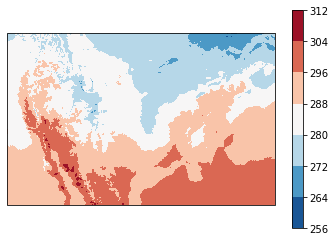

In [18]:
# Set the projection of the data
proj = ccrs.LambertConformal()

# Plot the data
fig = plt.figure()
ax = fig.add_subplot(projection=proj)
cntr = ax.contourf(rtmatemp, transform=proj, cmap='RdBu_r')
plt.colorbar(cntr)